In [ ]:
!pip install ucimlrepo shap

from ucimlrepo import fetch_ucirepo
import pandas as pd

# Load dataset
heart_disease = fetch_ucirepo(id=45)

# Features and target
X = heart_disease.data.features
y = heart_disease.data.targets

# Create a single DataFrame with target
df = pd.concat([X, y], axis=1)

# View basic info
print(df.head())
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       

In [ ]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.rename(columns={'num': 'target'}, inplace=True)


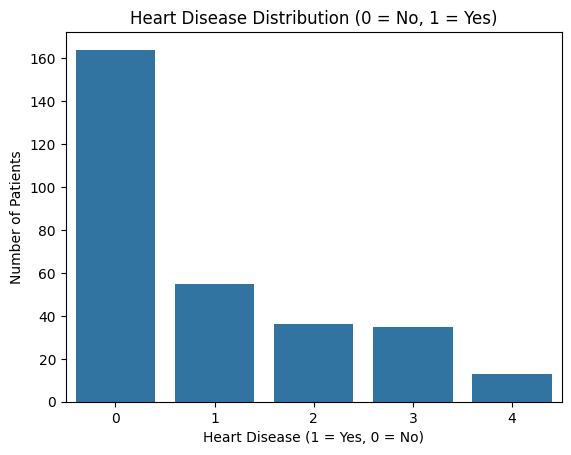

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1 = Yes)")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Number of Patients")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[28  0  1  0  0]
 [ 7  1  4  0  0]
 [ 3  2  1  3  0]
 [ 1  6  0  0  0]
 [ 0  2  1  1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.09      0.08      0.09        12
           2       0.14      0.11      0.12         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.19      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import StratifiedKFold
# Already addressed in most models using `train_test_split(..., stratify=y)`


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train with balanced class weights
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

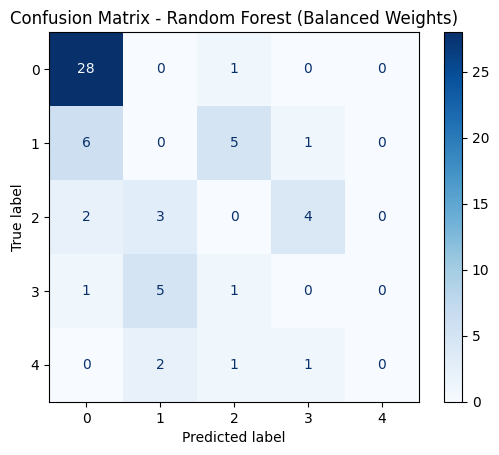

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Show confusion matrix
ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Balanced Weights)")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.97      0.85        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.15      0.19      0.17        61
weighted avg       0.36      0.46      0.40        61



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit and transform X_train_scaled
X_train_imputed = imputer.fit_transform(X_train_scaled)

# Now apply SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_imputed, y_train)


In [ ]:
!pip install xgboost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:20:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


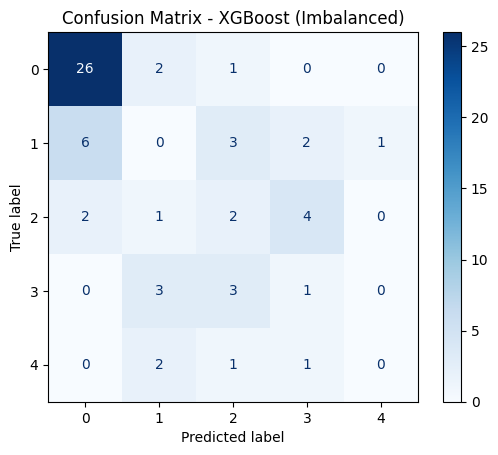

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.00      0.00      0.00        12
           2       0.20      0.22      0.21         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.22      0.25      0.23        61
weighted avg       0.41      0.48      0.44        61



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Train XGBoost on original (imbalanced) data
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - XGBoost (Imbalanced)")
plt.show()

# Metrics
print(classification_report(y_test, y_pred_xgb))


In [ ]:
!pip install imbalanced-learn xgboost


In [ ]:
import numpy as np
print("Missing values in X_train:", np.isnan(X_train_scaled).sum())


Missing values in X_train: 5


In [ ]:
from sklearn.impute import SimpleImputer

# Replace NaNs with column mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Then split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())


Before SMOTE: {0: 135, 1: 43, 3: 28, 2: 27, 4: 9}
After SMOTE: {0: 135, 3: 135, 1: 135, 2: 135, 4: 135}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:20:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


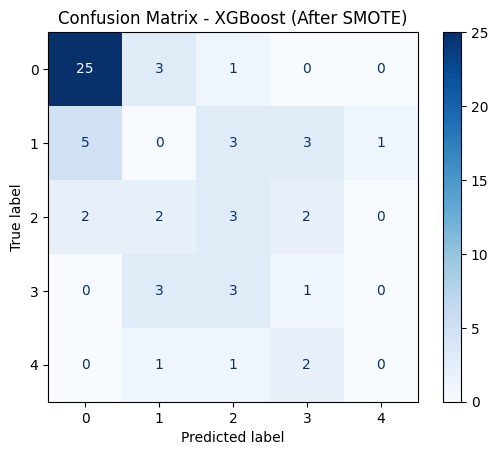

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.00      0.00      0.00        12
           2       0.27      0.33      0.30         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.24      0.27      0.25        61
weighted avg       0.43      0.48      0.45        61



In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train on resampled data
xgb_balanced = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=5,
    random_state=42,
    eval_metric='mlogloss',
    use_label_encoder=False
)

xgb_balanced.fit(X_train_res, y_train_res)

# Predict on original test set
y_pred_bal = xgb_balanced.predict(X_test_scaled)

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_balanced, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - XGBoost (After SMOTE)")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_bal))


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Define base learners
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
xgb_clf = xgb.XGBClassifier(objective='multi:softprob', num_class=5, eval_metric='mlogloss', random_state=42)

# Ensemble model
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('logreg', logreg),
    ('xgb', xgb_clf)
], voting='soft')

# Fit ensemble
ensemble.fit(X_train_res, y_train_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=42)),
                             ('logreg',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_roun...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_class=5, num_parallel_tree=None, ...))],
                 voting='soft')

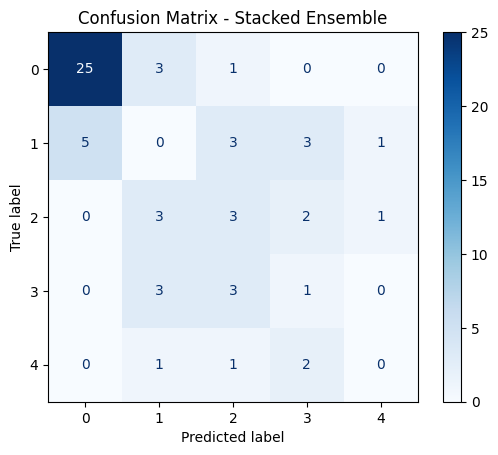

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.00      0.00      0.00        12
           2       0.27      0.33      0.30         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.25      0.27      0.26        61
weighted avg       0.45      0.48      0.46        61



In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_ensemble = ensemble.predict(X_test_scaled)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(ensemble, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix - Stacked Ensemble")
plt.show()

# Report
print(classification_report(y_test, y_pred_ensemble))


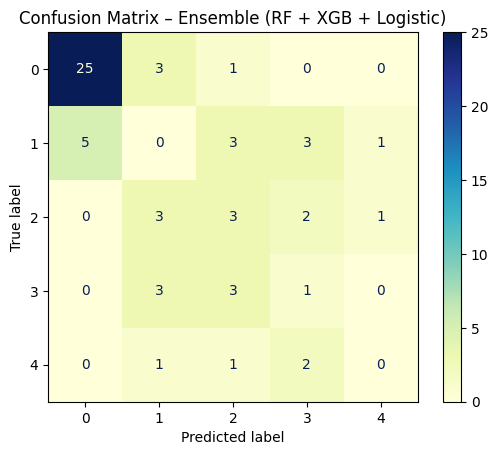

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.00      0.00      0.00        12
           2       0.27      0.33      0.30         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.25      0.27      0.26        61
weighted avg       0.45      0.48      0.46        61



In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the untouched test set
y_pred_ensemble = ensemble.predict(X_test_scaled)

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(ensemble, X_test_scaled, y_test, cmap='YlGnBu')
plt.title("Confusion Matrix – Ensemble (RF + XGB + Logistic)")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_ensemble))


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)
X_imputed = imp.fit_transform(X)


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00
0:	learn: 1.5674875	total: 83.5ms	remaining: 1m 23s
100:	learn: 0.4482963	total: 2.59s	remaining: 23.1s
200:	learn: 0.2391311	total: 3.52s	remaining: 14s
300:	learn: 0.1534095	total: 4.43s	remaining: 10.3s
400:	learn: 0.1094691	total: 5.37s	remaining: 8.02s
500:	learn: 0.0828879	total: 6.3s	remaining: 6.27s
600:	learn: 0.0661149	total: 7.22s	remaining: 4.79s
700:	learn: 0.0537523	total: 8.14s	remaining: 3.47s
800:	learn: 0.0453424	total: 9.06s	remaining: 2.25s
900:	learn: 0.0387836	total: 9.99s	remaining: 1.1s
999:	learn: 0.0339111	total: 10.9s	remaining: 0us


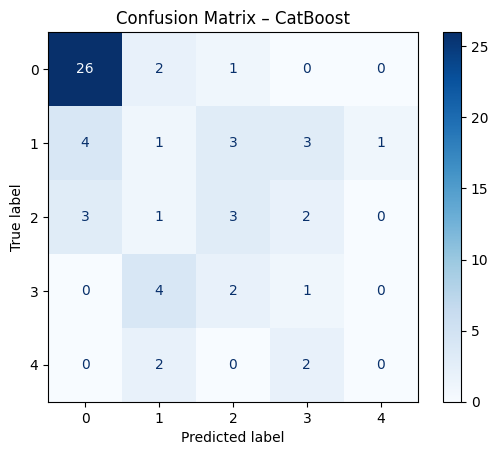

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.10      0.08      0.09        12
           2       0.33      0.33      0.33         9
           3       0.12      0.14      0.13         7
           4       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.27      0.29      0.28        61
weighted avg       0.46      0.51      0.48        61



In [ ]:
!pip install catboost

from catboost import CatBoostClassifier

cat = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiClass',
    random_seed=42,
    verbose=100
)

cat.fit(X_train_res, y_train_res)

# Predict
y_pred_cat = cat.predict(X_test_scaled)

# Evaluate
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(cat, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix – CatBoost")
plt.show()

print(classification_report(y_test, y_pred_cat))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Base model
xgb_base = xgb.XGBClassifier(objective='multi:softprob', num_class=5, eval_metric='mlogloss', use_label_encoder=False)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Randomized Search
random_search = RandomizedSearchCV(xgb_base, param_distributions=param_grid,
                                   scoring='f1_macro', cv=3, verbose=1, n_iter=10, random_state=42)
random_search.fit(X_train_res, y_train_res)

# Best model
xgb_tuned = random_search.best_estimator_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:23:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions after scaling
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% variance
X_train_pca = pca.fit_transform(X_train_res)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
!pip install lightgbm

import lightgbm as lgb

lgbm = lgb.LGBMClassifier(objective='multiclass', num_class=5, random_state=42)
lgbm.fit(X_train_res, y_train_res)

y_pred_lgbm = lgbm.predict(X_test_scaled)

from sklearn.metrics import classification_report
print("LightGBM Report:")
print(classification_report(y_test, y_pred_lgbm))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 675, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

LightGBM Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.00      0.00      0.00        12
           2       0.20      0.22      0.21         9
           3       0.11      0.14      0.12         7
           4       0.00      0.00      0.00         4

    accuracy                           0.48        61
   macro avg       0.22      0.25      0.23        61
weighted avg       0.41      0.48      0.44        61

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1523
[LightGBM] [Info] Number of data points in the train set: 675, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:24:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1075
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 851
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 13
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


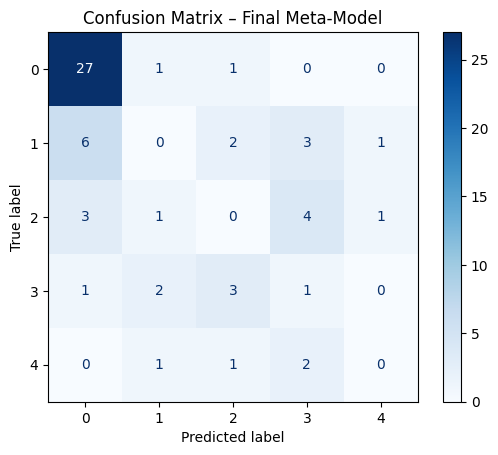

Final Meta-Model Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.10      0.14      0.12         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.17      0.21      0.19        61
weighted avg       0.36      0.46      0.40        61



In [ ]:
from sklearn.ensemble import StackingClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, loss_function='MultiClass')

# Base models
estimators = [
    ('xgb', xgb_tuned),
    ('cat', cat),
    ('lgbm', lgbm)
]

meta_model = StackingClassifier(
    estimators=estimators,
    final_estimator=xgb.XGBClassifier(objective='multi:softprob', num_class=5, eval_metric='mlogloss'),
    cv=3,
    stack_method='predict_proba'
)

meta_model.fit(X_train_res, y_train_res)

# Final predictions
y_pred_meta = meta_model.predict(X_test_scaled)

# Confusion Matrix & Report
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(meta_model, X_test_scaled, y_test, cmap='Blues')
plt.title("Confusion Matrix – Final Meta-Model")
plt.show()

print("Final Meta-Model Report:")
print(classification_report(y_test, y_pred_meta))


Final Meta-Model Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         9
           3       0.10      0.14      0.12         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.17      0.21      0.19        61
weighted avg       0.36      0.46      0.40        61

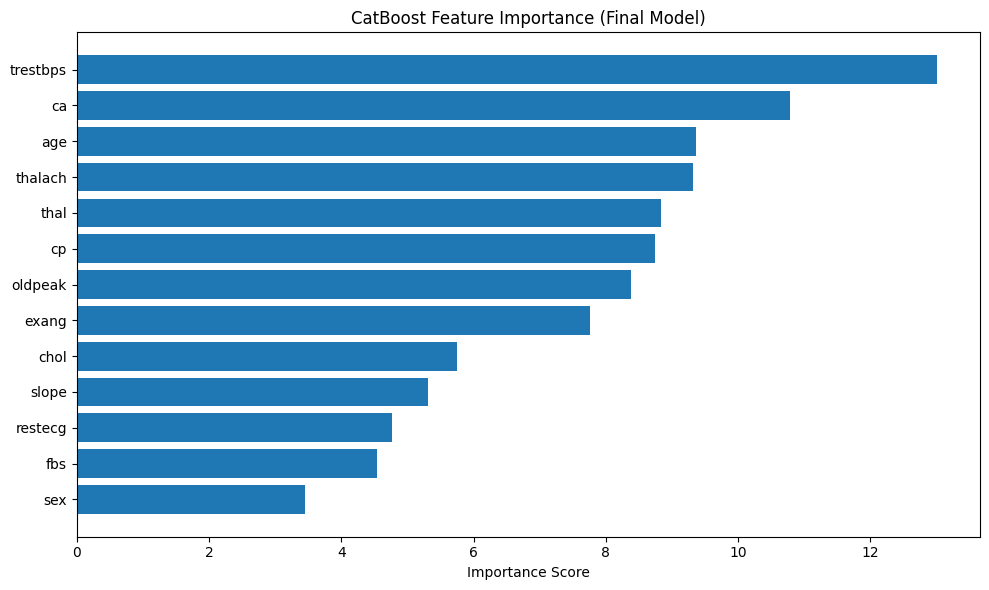

In [ ]:
from catboost import CatBoostClassifier, Pool

# Train CatBoost independently (with metadata)
cat_final = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    verbose=0,
    loss_function='MultiClass',
    random_seed=42
)

# Create Pool with proper feature names
feature_names = list(X.columns)
train_pool = Pool(data=X_train_res, label=y_train_res, feature_names=feature_names)

# Fit model
cat_final.fit(train_pool)

# Get feature importance
feature_importance = cat_final.get_feature_importance(train_pool)

# Plot
import pandas as pd
import matplotlib.pyplot as plt

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('CatBoost Feature Importance (Final Model)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [ ]:
pip install shap catboost


In [ ]:
import shap
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
import pandas as pd


In [ ]:
# Replace X_train_res, y_train_res, X_test_scaled with your variables

feature_names = list(X.columns)

# Pool object for CatBoost
train_pool = Pool(data=X_train_res, label=y_train_res, feature_names=feature_names)

# Train final model
cat = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, loss_function='MultiClass')
cat.fit(train_pool)


In [ ]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X_test_scaled)


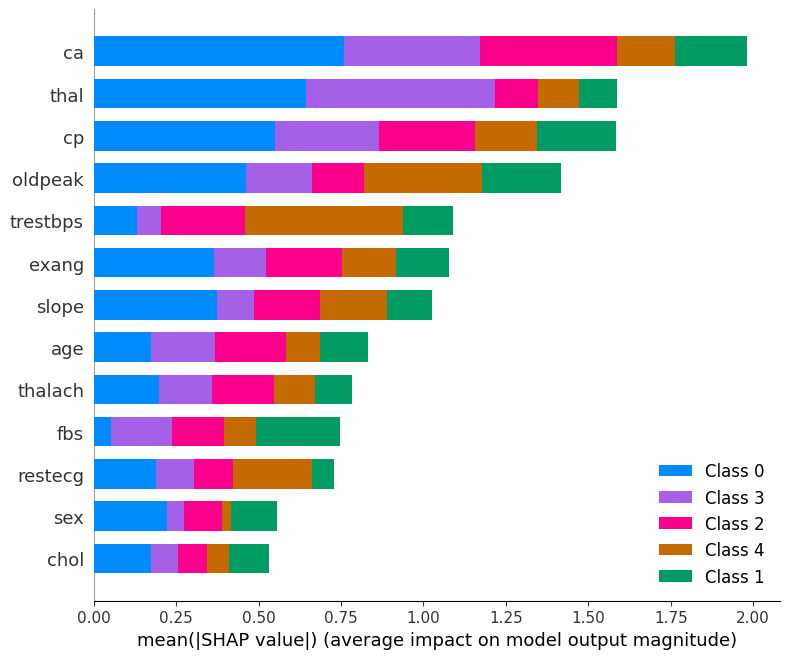

In [ ]:
# Summary bar plot (global feature importance)
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, plot_type="bar")


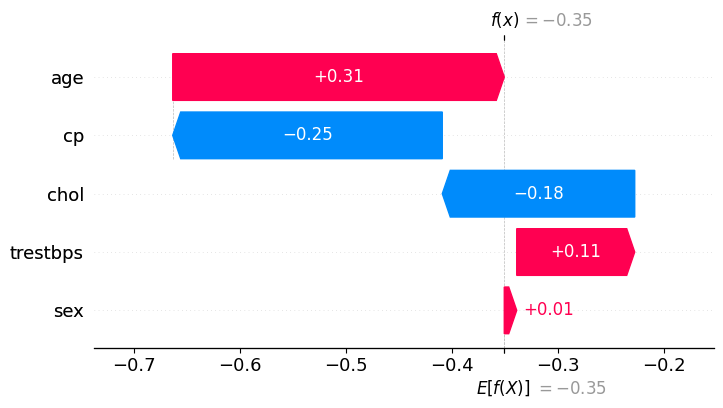

In [ ]:
# Waterfall plot for one test instance (e.g., index 0)
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[0],
    shap_values[0][0],  # class 0, instance 0
    feature_names=feature_names,
    max_display=10
)


In [ ]:
shap_values = explainer.shap_values(X_test_scaled)


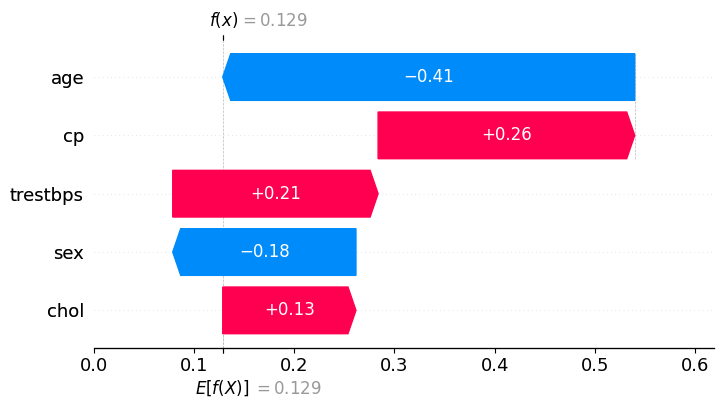

In [ ]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value[2],          # base value for class 2
    shap_values[2][2],                    # SHAP values for instance 2 and class 2
    feature_names=feature_names,
    max_display=10
)


SHAP Explanation for Class 0 (Patient 0)


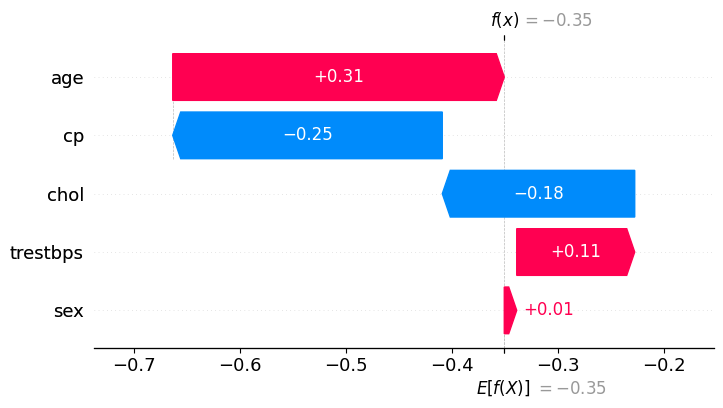

SHAP Explanation for Class 1 (Patient 0)


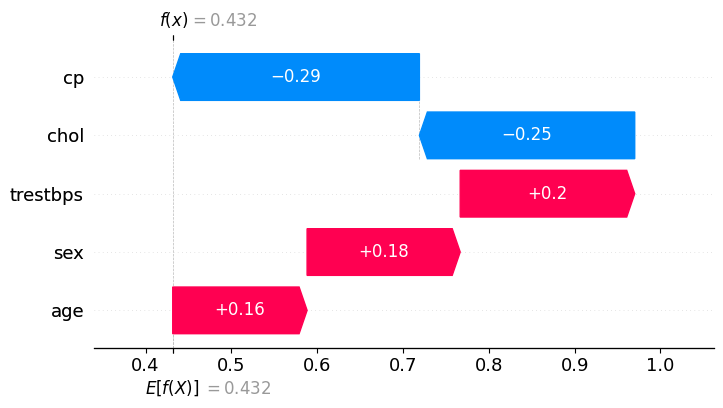

SHAP Explanation for Class 2 (Patient 0)


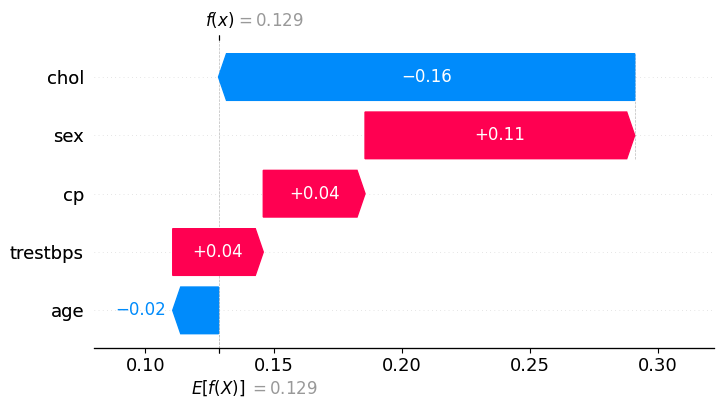

SHAP Explanation for Class 3 (Patient 0)


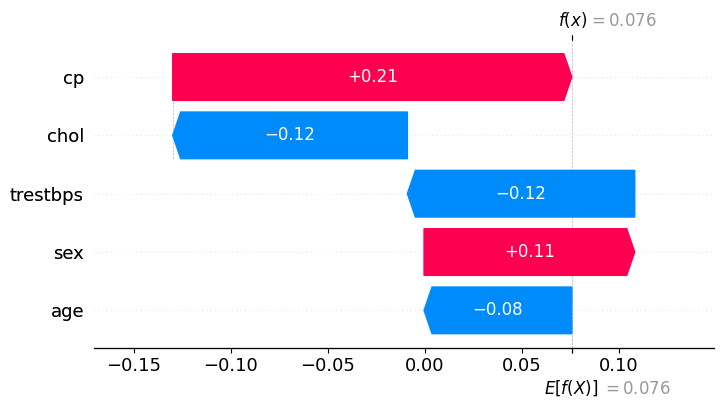

SHAP Explanation for Class 4 (Patient 0)


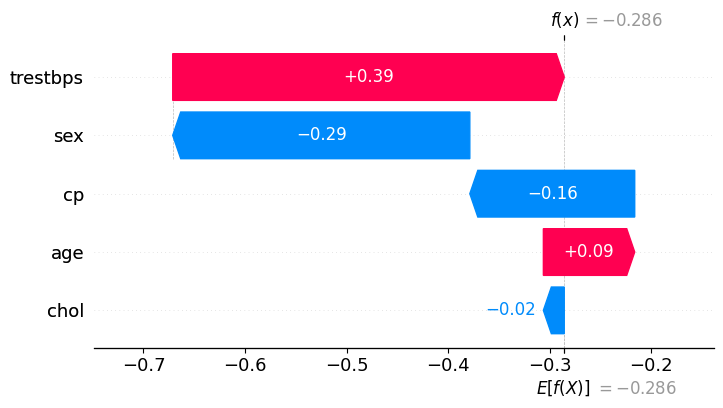

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you've already trained your CatBoost model as 'cat'
# And you have: feature_names, X_test_scaled, explainer, shap_values

person_index = 0  # change to view other patients

for class_index in range(5):  # for classes 0 to 4
    print(f"SHAP Explanation for Class {class_index} (Patient {person_index})")
    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value[class_index],
        shap_values[class_index][person_index],
        feature_names=feature_names,
        max_display=10
    )


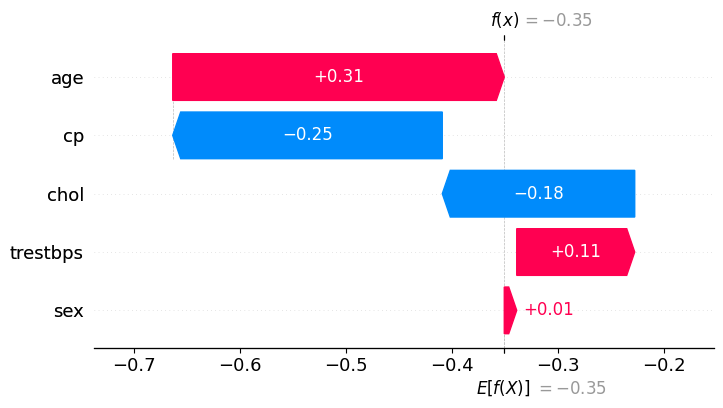

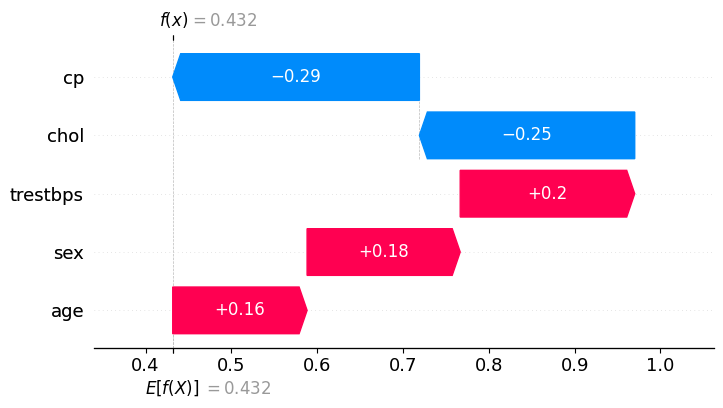

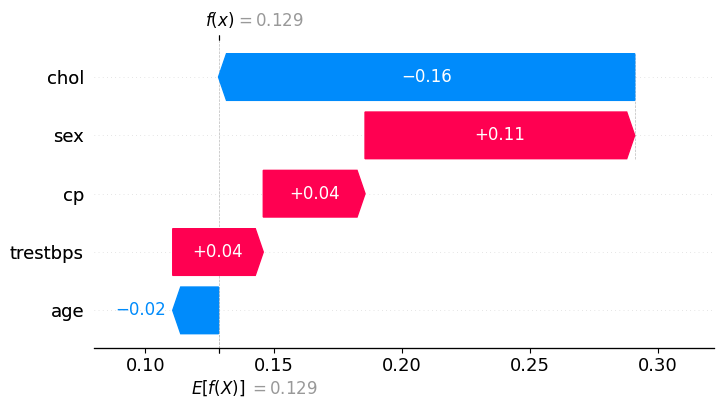

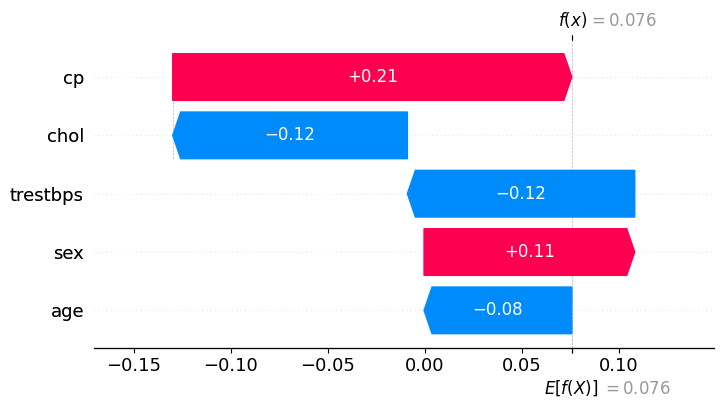

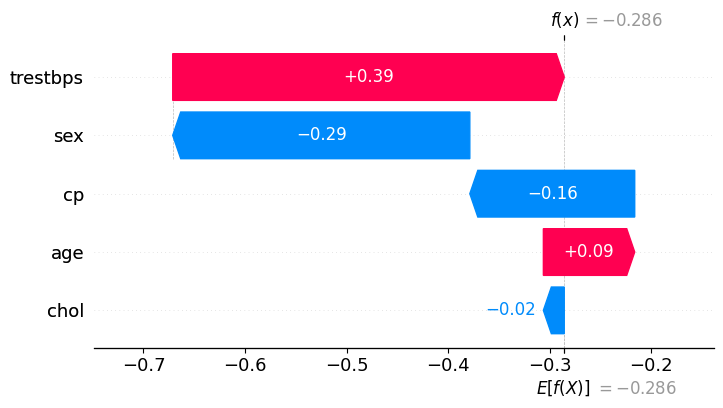

In [ ]:
import shap
import matplotlib.pyplot as plt

# Set the patient index to explain
person_index = 0  # change this to analyze other individuals

# Generate and save SHAP waterfall plots for all 5 classes
for class_index in range(5):
    plt.figure()
    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value[class_index],
        shap_values[class_index][person_index],
        feature_names=feature_names,
        max_display=10
    )
    plt.title(f"SHAP Waterfall – Class {class_index} for Patient {person_index}")
    plt.tight_layout()
    plt.savefig(f"shap_waterfall_class{class_index}_person{person_index}.png")
    plt.close()


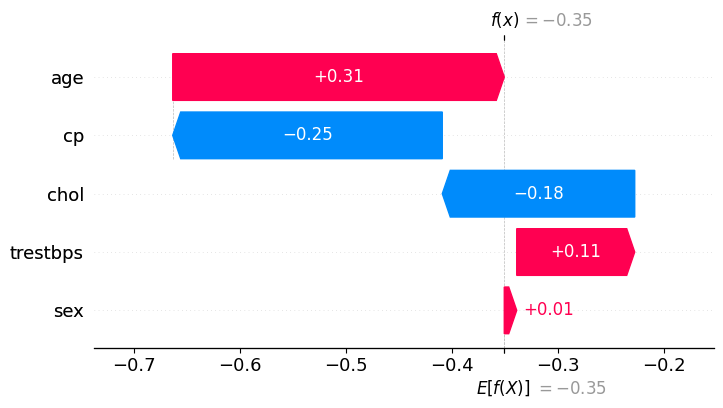

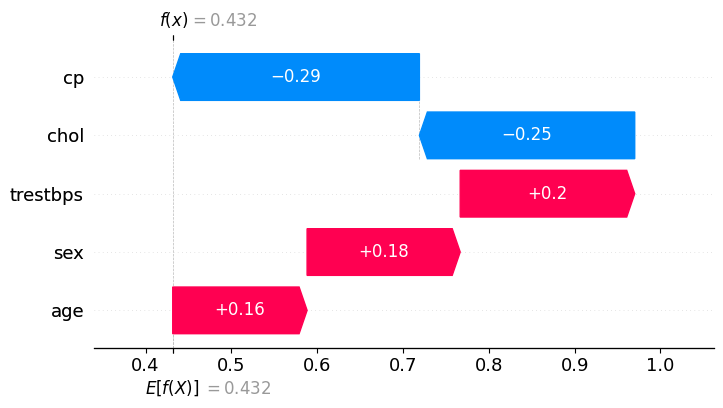

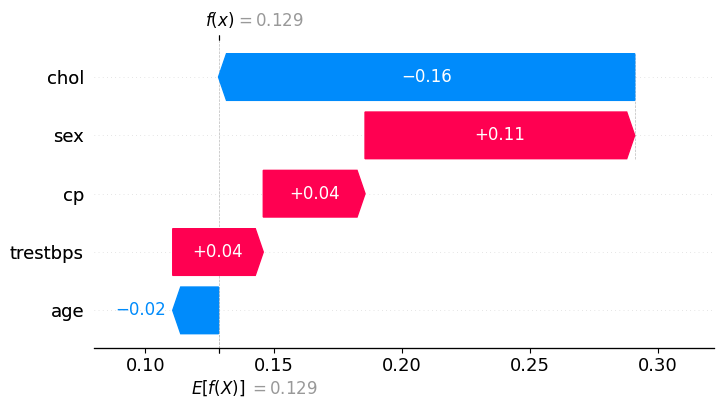

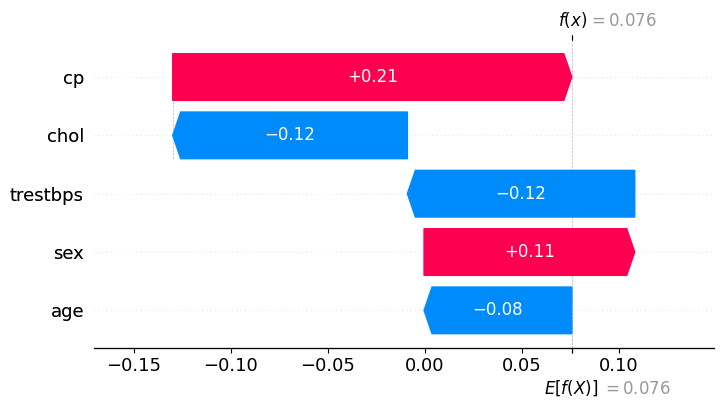

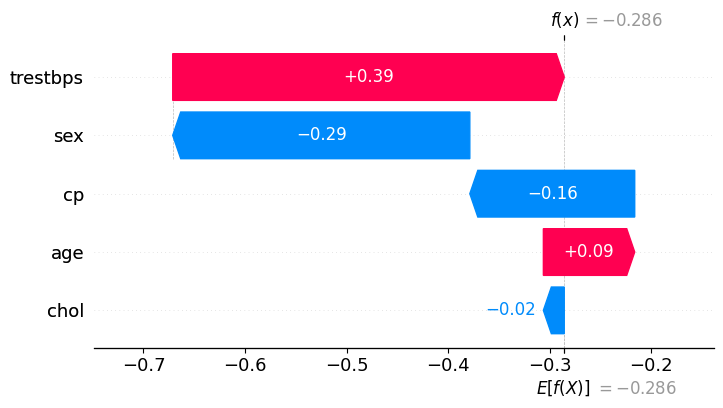

In [ ]:
import shap
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool

# Use your already-prepared feature data
feature_names = list(X.columns)

# Train the CatBoost model using Pool
train_pool = Pool(data=X_train_res, label=y_train_res, feature_names=feature_names)
cat = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, verbose=0, loss_function='MultiClass')
cat.fit(train_pool)

# SHAP explainer
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X_test_scaled)

# Save waterfall plots for one patient
person_index = 0
for class_index in range(5):
    plt.figure()
    shap.plots._waterfall.waterfall_legacy(
        explainer.expected_value[class_index],
        shap_values[class_index][person_index],
        feature_names=feature_names,
        max_display=10
    )
    plt.title(f"SHAP Waterfall – Class {class_index} for Patient {person_index}")
    plt.tight_layout()
    plt.savefig(f"shap_waterfall_class{class_index}_person{person_index}.png")
    plt.close()


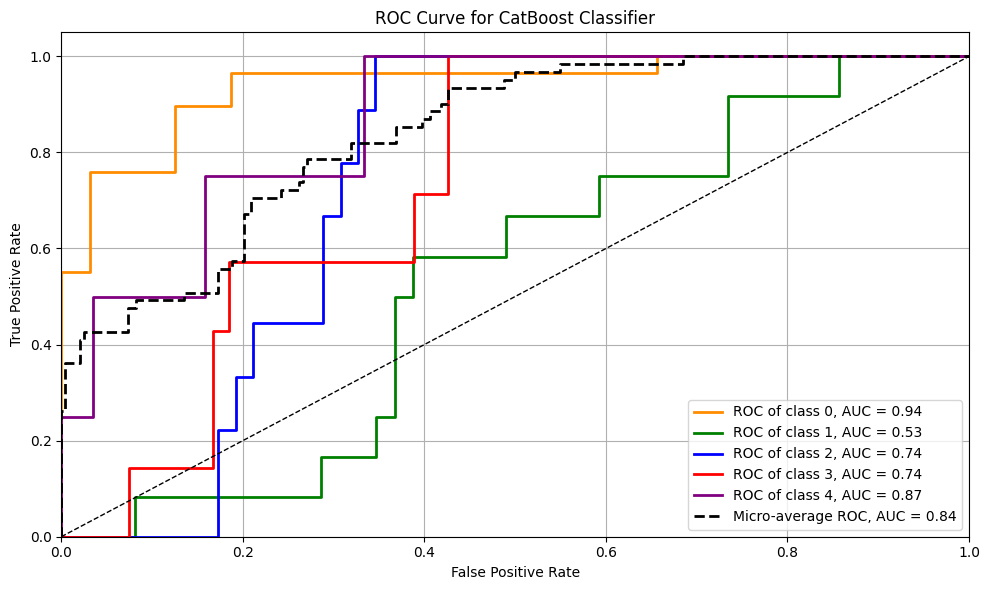

In [ ]:
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Binarize target
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

# Split and scale
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train CatBoost in OneVsRest fashion
cat_model = OneVsRestClassifier(CatBoostClassifier(verbose=0, random_state=42))
cat_model.fit(X_train_scaled, y_train_bin)
y_score = cat_model.predict_proba(X_test_scaled)

# ROC & AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 6))
colors = ['darkorange', 'green', 'blue', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC of class {i}, AUC = {roc_auc[i]:.2f}')
plt.plot(fpr["micro"], tpr["micro"], color='black', linestyle='--', lw=2,
         label=f"Micro-average ROC, AUC = {roc_auc['micro']:.2f}")
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost Classifier')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.savefig("catboost_roc_curve.png")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

# Define features and target
X = df.drop('target', axis=1)
y = df['target']
y_bin = label_binarize(y, classes=sorted(y.unique()))
n_classes = y_bin.shape[1]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    proba = model.predict_proba(X_test_scaled)
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')
    auc = roc_auc_score(label_binarize(y_test, classes=sorted(y.unique())), proba, average='micro')
    results.append((name, acc, f1, auc))

# Stacking ensemble (CatBoost as final estimator)
stack = StackingClassifier(
    estimators=[(k, v) for k, v in models.items() if k != "CatBoost"],
    final_estimator=CatBoostClassifier(verbose=0, random_state=42),
    passthrough=True
)
stack.fit(X_train_scaled, y_train)
stack_preds = stack.predict(X_test_scaled)
stack_proba = stack.predict_proba(X_test_scaled)
stack_acc = accuracy_score(y_test, stack_preds)
stack_f1 = f1_score(y_test, stack_preds, average='macro')
stack_auc = roc_auc_score(label_binarize(y_test, classes=sorted(y.unique())), stack_proba, average='micro')
results.append(("Stacking Ensemble", stack_acc, stack_f1, stack_auc))

# Show results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "ROC AUC (Micro)"])
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score -0.613740
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -2.121642
[LightGBM] [Info] Start training from score -2.156733
[LightGBM] [Info] Start training from score -3.186353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score -0.613740
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -2.121642
[LightGBM] [Info] Start training from score -2.156733
[LightGBM] [Info] Start training from score -3.186353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 an

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 193, number of used features: 13
[LightGBM] [Info] Start training from score -0.608730
[LightGBM] [Info] Start training from score -1.707342
[LightGBM] [Info] Start training from score -2.127196
[LightGBM] [Info] Start training from score -2.171648
[LightGBM] [Info] Start training from score -3.183249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


               Model  Accuracy  F1 Score  ROC AUC (Micro)
0      Random Forest  0.540984  0.203742         0.860320
1            XGBoost  0.508197  0.246651         0.831967
2           LightGBM  0.491803  0.185403         0.835125
3           CatBoost  0.557377  0.228502         0.851250
4  Stacking Ensemble  0.540984  0.250769         0.859178


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:37:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score -0.613740
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -2.121642
[LightGBM] [Info] Start training from score -2.156733
[LightGBM] [Info] Start training from score -3.186353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 250
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] Start training from score -0.613740
[LightGBM] [Info] Start training from score -1.704748
[LightGBM] [Info] Start training from score -2.121642
[LightGBM] [Info] Start training from score -2.156733
[LightGBM] [Info] Start training from score -3.186353
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:37:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:37:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:38:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 193, number of used features: 13
[LightGBM] [Info] Start training from score -0.608730
[LightGBM] [Info] Start training from score -1.707342
[LightGBM] [Info] Start training from score -2.127196
[LightGBM] [Info] Start training from score -2.171648
[LightGBM] [Info] Start training from score -3.183249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 227
[LightGBM] [Info] Number of data points in the train set: 194, number of used features: 13
[LightGBM] [Info] Start training from score -0.623467
[LightGBM] [Info] Start training from score -1.684339
[LightGBM] [Info] Start training from score -2.132364
[LightGBM] [Info] Start training from score -2.132364
[LightGBM] [Info] Start training from score -3.188417
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


               Model  Accuracy  F1 Score  ROC AUC (Micro)
0      Random Forest  0.540984  0.203742         0.860320
1            XGBoost  0.508197  0.246651         0.831967
2           LightGBM  0.491803  0.185403         0.835125
3           CatBoost  0.557377  0.228502         0.851250
4  Stacking Ensemble  0.540984  0.250769         0.859178


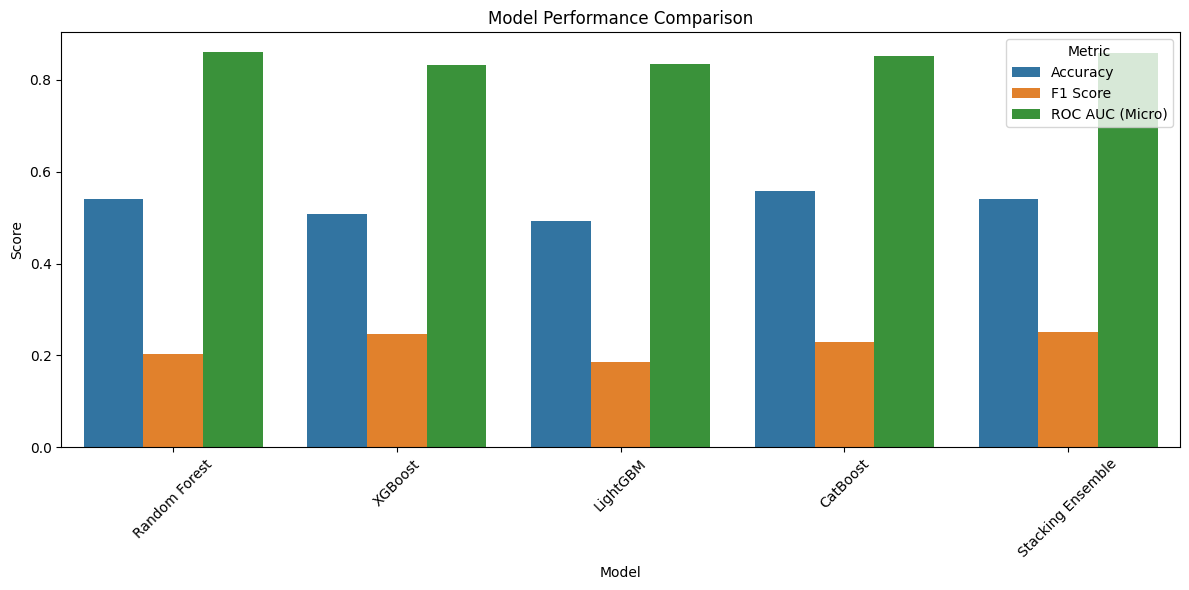

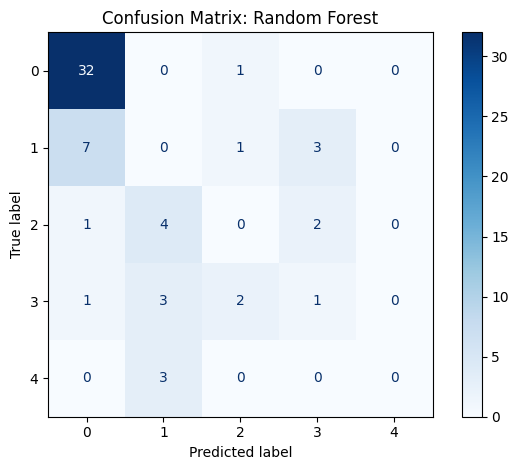

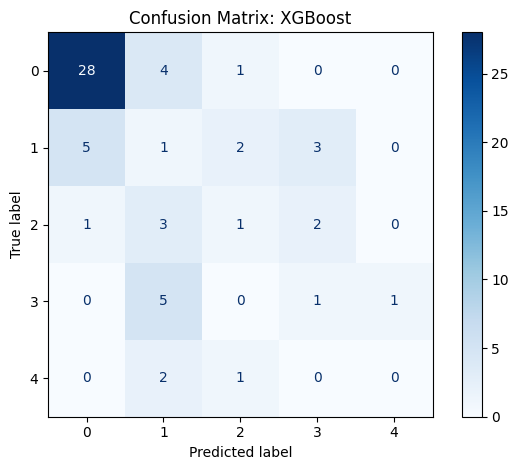

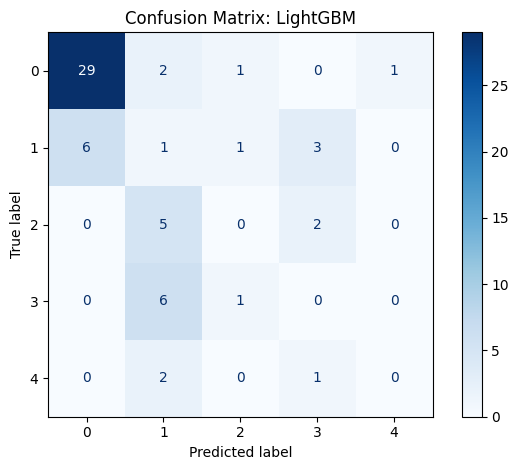

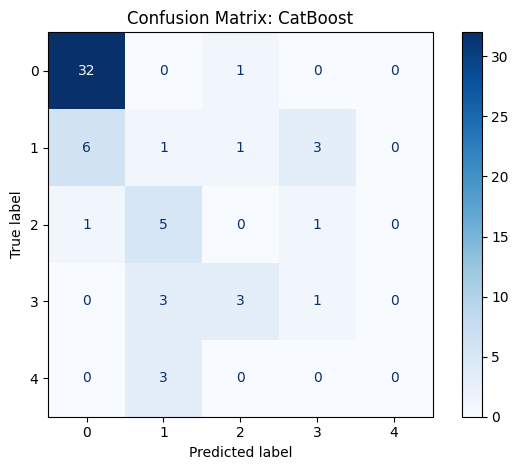

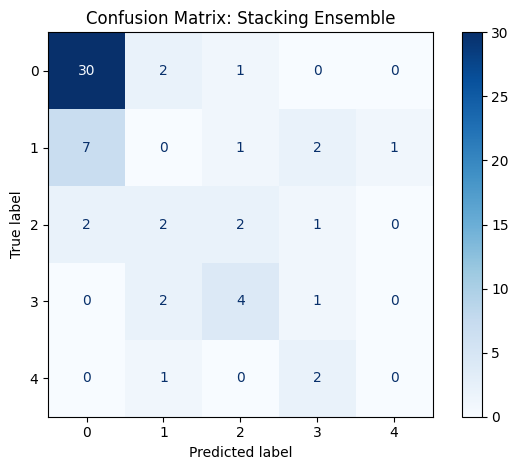

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define features and target
X = df.drop('target', axis=1)
y = df['target']
y_bin = label_binarize(y, classes=sorted(y.unique()))
n_classes = y_bin.shape[1]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

results = []
conf_matrices = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    proba = model.predict_proba(X_test_scaled)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')
    auc = roc_auc_score(label_binarize(y_test, classes=sorted(y.unique())), proba, average='micro')

    results.append((name, acc, f1, auc))
    conf_matrices[name] = confusion_matrix(y_test, preds)

# Stacking ensemble with CatBoost as final estimator
stack = StackingClassifier(
    estimators=[(k, v) for k, v in models.items() if k != "CatBoost"],
    final_estimator=CatBoostClassifier(verbose=0, random_state=42),
    passthrough=True
)
stack.fit(X_train_scaled, y_train)
stack_preds = stack.predict(X_test_scaled)
stack_proba = stack.predict_proba(X_test_scaled)

stack_acc = accuracy_score(y_test, stack_preds)
stack_f1 = f1_score(y_test, stack_preds, average='macro')
stack_auc = roc_auc_score(label_binarize(y_test, classes=sorted(y.unique())), stack_proba, average='micro')

results.append(("Stacking Ensemble", stack_acc, stack_f1, stack_auc))
conf_matrices["Stacking Ensemble"] = confusion_matrix(y_test, stack_preds)

# Results table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score", "ROC AUC (Micro)"])
print(results_df)

# Bar plot for metrics comparison
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display confusion matrices
for model_name, cm in conf_matrices.items():
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np

# Define the 13 medical features
feature_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
]

# Descriptions for each feature to guide input
feature_desc = {
    'age': 'Age of the patient',
    'sex': 'Gender (0 = female, 1 = male)',
    'cp': 'Chest pain type (0 = typical angina to 3 = asymptomatic)',
    'trestbps': 'Resting blood pressure',
    'chol': 'Serum cholesterol (mg/dL)',
    'fbs': 'Fasting blood sugar > 120 mg/dL (1 = true)',
    'restecg': 'Resting ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable LVH)',
    'thalach': 'Max heart rate achieved',
    'exang': 'Exercise-induced angina (1 = yes)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)',
    'ca': 'Number of major vessels (0–3)',
    'thal': 'Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)'
}

# Prompt user to enter values for each feature
print("\n🩺 Please enter the following medical details:\n")
input_data = []
for feat in feature_names:
    while True:
        try:
            value = float(input(f"{feat} ({feature_desc[feat]}): "))
            input_data.append(value)
            break
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Convert to array and scale using existing scaler
input_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_array)

# Predict using CatBoost One-vs-Rest model
proba = cat_model.predict_proba(input_scaled)
predicted_class = np.argmax(proba)

# Interpretation mapping
interpretation = {
    0: "No signs of heart disease. Healthy condition.",
    1: "Mild heart condition. Routine check-ups advised.",
    2: "Moderate heart condition. Further testing recommended.",
    3: "Severe heart condition. Requires medical intervention.",
    4: "Critical heart condition. Immediate attention needed!"
}

# Display results
print("\n🧠 Prediction Result:")
print(f"Predicted Class: {predicted_class}")
print(f"Conclusion: {interpretation.get(predicted_class, 'Unknown category')}")



🩺 Please enter the following medical details:

age (Age of the patient): 45
sex (Gender (0 = female, 1 = male)): 1
cp (Chest pain type (0 = typical angina to 3 = asymptomatic)): 1
trestbps (Resting blood pressure): 130
chol (Serum cholesterol (mg/dL)): 220
fbs (Fasting blood sugar > 120 mg/dL (1 = true)): 0
restecg (Resting ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable LVH)): 0
thalach (Max heart rate achieved): 210
exang (Exercise-induced angina (1 = yes)): 1
oldpeak (ST depression induced by exercise): 1.4
slope (Slope of peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)): 1
ca (Number of major vessels (0–3)): 1.0
thal (Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)): 3.0

🧠 Prediction Result:
Predicted Class: 0
Conclusion: No signs of heart disease. Healthy condition.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd

# Define medical features and descriptions
feature_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'
]

feature_desc = {
    'age': 'Age of the patient',
    'sex': 'Gender (0 = female, 1 = male)',
    'cp': 'Chest pain type (0 = typical angina to 3 = asymptomatic)',
    'trestbps': 'Resting blood pressure',
    'chol': 'Serum cholesterol (mg/dL)',
    'fbs': 'Fasting blood sugar > 120 mg/dL (1 = true)',
    'restecg': 'Resting ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable LVH)',
    'thalach': 'Max heart rate achieved',
    'exang': 'Exercise-induced angina (1 = yes)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'Slope of peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)',
    'ca': 'Number of major vessels (0–3)',
    'thal': 'Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)'
}

# Get user input
print("\n🩺 Please enter the following medical details:\n")
input_data = []
for feat in feature_names:
    while True:
        try:
            value = float(input(f"{feat} ({feature_desc[feat]}): "))
            input_data.append(value)
            break
        except ValueError:
            print("❗ Invalid input. Please enter a numeric value.")

# Convert, scale, predict
input_array = np.array(input_data).reshape(1, -1)
input_scaled = scaler.transform(input_array)
proba = cat_model.predict_proba(input_scaled)
predicted_class = int(np.argmax(proba))

# Create DataFrame for better display
df_input = pd.DataFrame([input_data], columns=feature_names)

# Custom interpretation
interpretation = {
    0: "No signs of heart disease. Healthy condition.",
    1: "Mild heart condition. Routine check-ups advised.",
    2: "Moderate heart condition. Further testing recommended.",
    3: "Severe heart condition. Requires medical intervention.",
    4: "Critical heart condition. Immediate attention needed!"
}

# Key insights based on entered values
age = input_data[0]
bp = input_data[3]
chol = input_data[4]
thalach = input_data[7]
oldpeak = input_data[9]
ca = input_data[11]

insights = []

if age >= 45:
    insights.append("• Age is above 45, which increases cardiovascular risk.")
if bp > 130:
    insights.append("• Resting blood pressure is elevated — monitor hypertension risk.")
if chol > 200:
    insights.append("• Cholesterol level is above normal — may lead to plaque buildup.")
if thalach < 150:
    insights.append("• Max heart rate is lower than ideal — could indicate reduced fitness.")
if oldpeak > 1.0:
    insights.append("• ST depression is present — may reflect underlying ischemia.")
if ca > 0:
    insights.append("• At least one major vessel is affected — this needs further evaluation.")

# Output prediction and insights
print("\n🧠 Prediction Summary:")
print(f"Predicted Class: {predicted_class}")
print(f"Conclusion: {interpretation.get(predicted_class)}")

print("\n📋 Patient Input Summary:")
print(df_input.T.rename(columns={0: "Value"}))

print("\n📊 Key Health Insights:")
if insights:
    for point in insights:
        print(point)
else:
    print("• All indicators are within healthy ranges.")

print("\n✅ Recommendation:")
if predicted_class == 0:
    print("Continue maintaining a healthy lifestyle. Routine check-ups every 6–12 months.")
else:
    print("We advise scheduling a follow-up consultation with a cardiologist for further evaluation.")



🩺 Please enter the following medical details:

age (Age of the patient): 45
sex (Gender (0 = female, 1 = male)): 1
cp (Chest pain type (0 = typical angina to 3 = asymptomatic)): 2
trestbps (Resting blood pressure): 120
chol (Serum cholesterol (mg/dL)): 230
fbs (Fasting blood sugar > 120 mg/dL (1 = true)): 0
restecg (Resting ECG results (0 = normal, 1 = ST-T abnormality, 2 = probable LVH)): 0
thalach (Max heart rate achieved): 210
exang (Exercise-induced angina (1 = yes)): 1
oldpeak (ST depression induced by exercise): 1.8
slope (Slope of peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)): 1
ca (Number of major vessels (0–3)): 1.0
thal (Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect)): 3.0

🧠 Prediction Summary:
Predicted Class: 0
Conclusion: No signs of heart disease. Healthy condition.

📋 Patient Input Summary:
          Value
age        45.0
sex         1.0
cp          2.0
trestbps  120.0
chol      230.0
fbs         0.0
restecg     0.0
thalach   2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
